In [39]:
# setup, load dataset and imports
# reading image fails with opencv, using Pillow

import os
import pandas as pd
import numpy as np
from PIL import Image
import collections

import matplotlib.pyplot as plt

IMAGE = 'image'
EMOTION = 'emotion'
DATASET = '../facial_expressions/'
images_path = DATASET + 'images'
csv_path = DATASET + '/data/legend.csv'

legend = pd.read_csv(csv_path)
print(legend[EMOTION].unique())
legend[EMOTION] = legend[EMOTION].str.upper()
# convert classes to 7

# Create class map (unique class labels mapped to indices)
classes = legend[EMOTION].unique()
classMap = {i: class_name for i, class_name in enumerate(classes)}


# Add numeric labels to the dataframe
class_to_index = {class_name: i for i, class_name in enumerate(classes)}
legend['class_index'] = legend[EMOTION].map(class_to_index)


X = []
y = []

for _, row in legend.iterrows():
    image_file = row[IMAGE]
    class_index = row['class_index']
    
    img_path = os.path.join(images_path, image_file)
    
    with Image.open(img_path) as img:
        img_array = np.array(img)
        if(img_array.shape == (350,350)):
            X.append(img_array)
            y.append(class_index)
    
print(f'{len(X)} of 13690 images have shape (350,350). Using only them.')

# int or float?
X = np.array(X)
y = np.array(y)

print(f"ClassMap: {classMap}")


['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt' 'NEUTRAL' 'SADNESS' 'DISGUST' 'FEAR' 'SURPRISE' 'ANGER'
 'HAPPINESS']
12765 of 13690 images have shape (350,350). Using only them.
ClassMap: {0: 'ANGER', 1: 'SURPRISE', 2: 'DISGUST', 3: 'FEAR', 4: 'NEUTRAL', 5: 'HAPPINESS', 6: 'SADNESS', 7: 'CONTEMPT'}


[[  9   9   9 ...  42  41  41]
 [  9   9   9 ...  41  41  41]
 [  8   8   9 ...  42  41  41]
 ...
 [160 160 161 ...  68  69  70]
 [159 159 160 ...  67  69  69]
 [159 159 160 ...  67  69  69]]


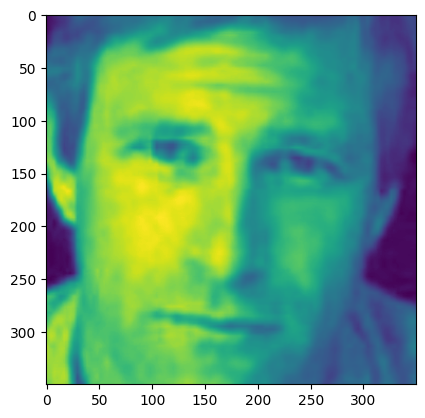

In [40]:
# display images for happiness

print(X[0])
plt.imshow(X[0])#, cmap='gray')